In [1]:
from statistics import mean
import numpy as np
from matplotlib import pyplot as plt
import random 

# Create A Dataset

In [2]:
def create_dataset(hm, variance, step=2, correlation = False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)

    if correlation and correlation == "pos":
        val += step
    elif correlation and correlation == "neg":
        val -= step
      
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

xs, ys = create_dataset(40, 10, 10, correlation = "neg")
print("xs:", xs)
print("ys:", ys)

xs: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39.]
ys: [ 5. -3.  8. -4.  3. -5.  0. 10.  4.  3.  7. -4. -4.  1. -6. -5.  3.  9.
  5.  8.  4.  1.  5.  9.  8.  3. -1. -4.  3. -7. -5.  2. -4. 10.  0. -7.
 -8.  9.  9. -3.]


### Regression Line Formula: $ \bar{y} = m \bar{x} + b $

In [3]:
# xs = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
# ys = np.array([6, 12, 13, 13, 15, 16, 13, 18, 19, 19], dtype=np.float64)

def best_fit_slope_and_intercept(xs, ys):    
    m =  ( ((mean(xs) * mean(ys)) - (mean(xs * ys))) /
          ((mean(xs)* mean(xs)) - (mean(xs*xs))) )
    
    b = ( mean(ys) -  ( m * mean(xs) ) )
    return m, b;

m, b = best_fit_slope_and_intercept(xs, ys)
print(m, b)

regression_line = [ (m*x)+b  for x in xs ]
print(regression_line)

-0.03517823639774862 2.160975609756098
[2.160975609756098, 2.1257973733583495, 2.090619136960601, 2.0554409005628522, 2.0202626641651036, 1.985084427767355, 1.9499061913696063, 1.9147279549718579, 1.8795497185741092, 1.8443714821763606, 1.809193245778612, 1.7740150093808633, 1.7388367729831147, 1.703658536585366, 1.6684803001876174, 1.633302063789869, 1.5981238273921203, 1.5629455909943717, 1.527767354596623, 1.4925891181988744, 1.4574108818011258, 1.4222326454033771, 1.3870544090056285, 1.3518761726078798, 1.3166979362101312, 1.2815196998123826, 1.246341463414634, 1.2111632270168853, 1.1759849906191366, 1.1408067542213882, 1.1056285178236396, 1.070450281425891, 1.0352720450281423, 1.0000938086303937, 0.964915572232645, 0.9297373358348964, 0.8945590994371477, 0.8593808630393991, 0.8242026266416507, 0.789024390243902]


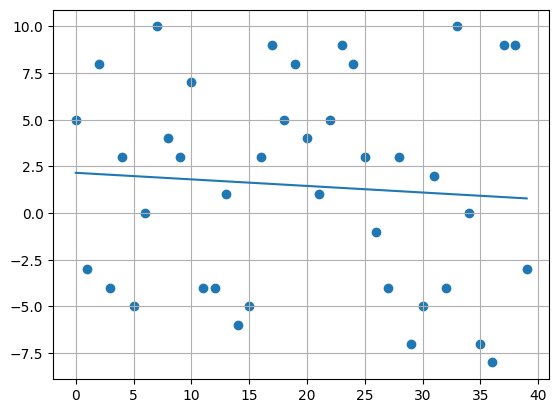

In [4]:
plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.grid()
plt.show()

# Prediction

In [5]:
predict_x = 14
predict_y = (m*predict_x) + b
print("Predict y:", round(predict_y, 2))

Predict y: 1.67


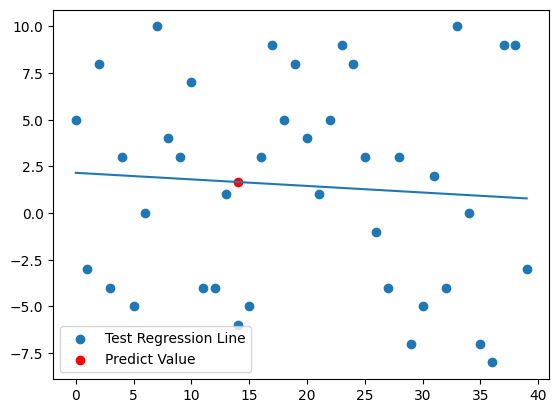

In [6]:
plt.scatter(xs, ys, label="Test Regression Line")
plt.scatter(predict_x, predict_y, color='red', label="Predict Value")
plt.plot(xs, regression_line)
plt.legend()
plt.show()

# R Squared

$ R^2 = 1 - \frac{SSR}{SST} = 1 - \frac{\sum (y-\hat{y})^2 }{\sum (y-\bar{y})^2} $

In [7]:
def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig) ** 2)

def coefficient_of_determination(ys_orig, ys_line):
    ys_mean_line = [np.mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, ys_mean_line)
    return (1 - (squared_error_regr / squared_error_y_mean)) 
    
r_squared = coefficient_of_determination(ys, regression_line)
print("R Squared Value:", r_squared)

R Squared Value: 0.005460311119499517
